In [ ]:
import pandas as pd
import numpy as np

## 8.1. 멀티 인덱스

### 8.1.1. 멀티인덱스의 인덱싱/슬라이싱

#### 시리즈의 경우

In [ ]:
## 기존의 시리즈 인덱싱/슬라이싱은 이렇게 했다!

s = pd.Series(np.arange(10), index = ['a','a','a','b','b','b','c','c','c','c'])
s

In [ ]:
print(s.loc['a'])
print(s.loc['a':'b'])
print(s.loc[['a','c']])

In [ ]:
## 파이썬처럼 그냥 슬라이싱도 가능하지만, iloc/loc를 쓰는 방식이 더 추천된다.
## 출처: https://stackoverflow.com/questions/45983801/pandas-iloc-vs-direct-slicing

print(s['a'])
print(s['a':'b'])
print(s[['a','c']])

In [ ]:
data = pd.Series(np.arange(100,110),
                 index = [['a','a','a','b','b','b','c','c','c','c'],
                          [1,1,3,1,3,1,1,2,2,3]])

data

In [ ]:
data.index

In [ ]:
print(
    data.loc['a'],
    data.loc['a':'b'],
    data.loc[['a', 'c']],    ## 괄호를 하나 더 쓴 것에 주의하자!
    sep = '\n\n'
)

In [ ]:
print(
    data.loc[:,1],      ## iloc가 아니라 loc다!
    data.loc['a',1],
    data.loc[['a','c'],1],
    sep='\n\n'
)


#### 데이터 프레임의 경우

In [ ]:
df = pd.DataFrame(np.arange(9).reshape(3,3), index = ['a','b','c'], columns=[1,2,3])
df

In [ ]:
print(df.loc['a', :])
print(df.loc[:, 2])
print('\n')

print(df.loc['a', 2])
print('\n')

print(df.iloc[0,:])     ## iloc는 주어진 칼럼/인덱스명과 무관하게 컴퓨터 고유의 인덱스값(0부터 시작하는 값)을 기준으로 색인한다!!
print(df.iloc[:,2])

In [ ]:
## 멀티인덱스를 가진 데이터프레임
ddf = pd.DataFrame(np.arange(20).reshape(4,5), index = [['a','a','b','b'], ['x','y','x','y']], columns=[[100,100,200,200,200], [88,88,88,77,77]])
ddf.columns.names = ['hundred', 'ten']

ddf

In [ ]:
print(ddf.loc['a'], type(ddf.loc['a']))
print('\n')

print(ddf.loc['a','x'], type(ddf.loc['a','x']))   ## 멀티인덱스를 가진 시리즈!
print('\n')

print(ddf.loc[:,:], type(ddf.loc['a']))
print('\n')

print(ddf.loc['a','x'].loc[200], type(ddf.loc['a','x'].loc[200]))
print('\n')

print(ddf.loc['a','x'].loc[200,88], type(ddf.loc['a','x'].loc[200,88]))

##### 🤔 데이터 프레임과 시리즈의 관계
+ 데이터프레임은 멀티인덱스가 있는 시리즈에서 하나의 인덱스의 축을 바꾼 것과 같다.(axis=0 --> axis=1)
  + stack은 칼럼을 로우로 바꾸고,
  + unstack은 로우를 칼럼으로 바꾼다!

In [ ]:
data = pd.Series(np.arange(9), index = [['a','a','a','b','b','c','c','d','d'], [1,2,3,1,3,1,2,2,3]])
data

In [ ]:
udata = data.unstack()
print(type(udata))
print(udata.index, udata.columns)
udata

In [ ]:
udata.stack()

In [ ]:
## 데이터 프레임 역시 마찬가지! 시리즈로 쉽게 바꿀 수 있다!
df = pd.DataFrame(np.arange(9).reshape(3,3), index = ['a','b','c'], columns=[1,2,3])
df

In [ ]:
udf = df.unstack()
print(type(udf))
print(udf.index)
udf

In [ ]:
print(df.index, df.columns)
print(type(df.index), type(df.columns))

## !! 인덱스나 칼럼이나 둘 다 결국은 인덱스 데이터타입이구나!!

In [ ]:
ddf = pd.DataFrame(np.arange(20).reshape(4,5), index = [['a','a','b','b'], ['x','y','x','y']], columns=[[100,100,200,200,200], [88,88,88,77,77]])
ddf

In [ ]:
uddf = ddf.unstack()
print(uddf.index, uddf.columns)
uddf

In [ ]:
uuddf = uddf.unstack()
print(uuddf)
print(uuddf.index)

##### 연습문제1
아래 데이터프레임에서 단과대학이 문과대학, 학과가 언어학과이고, 점수가 65점 이하인 학생의 이름만 추출하시오.

In [ ]:
df = pd.DataFrame({'name': ['A','B','C','D','E','F'],
                       'score': [60,70,100,20,30,40]}, 
                      index = [['문대','문대','문대','문대','정대','정대'],['언어','언어','영문','언어','통계','통계']],
                      )
df.index.names = ('단대','학과')
df

### 8.1.2. 멀티인덱스의 순서바꾸기/정렬하기

#### 순서 바꾸기

In [ ]:
ddf = pd.DataFrame(np.arange(20).reshape(4,5), index = [['a','a','b','b'], ['x','y','x','y']], columns=[[100,100,200,200,200], [88,88,88,77,77]])
ddf

In [ ]:
ddf.swaplevel(0,1)

In [ ]:
ddf.swaplevel(0,1, axis=1)

In [ ]:
ddf.index.names = ['ab', 'xy']
ddf.columns.names = ['hundred', 'ten']
ddf

In [ ]:
ddf.swaplevel('ab','xy')

In [ ]:
ddf.swaplevel('hundred','ten', axis=1)

In [ ]:
ddf

#### 정렬하기

In [ ]:
ddf = pd.DataFrame(np.arange(20).reshape(4,5), index = [['a','a','b','b'], ['x','y','x','y']], columns=[[100,100,200,200,200], [88,88,88,77,77]])
ddf.index.names = ['ab', 'xy']
ddf.columns.names = ['hundred', 'ten']
ddf

In [ ]:
ddf.sort_index(level=0)

In [ ]:
ddf.sort_index(level=1)

In [ ]:
ddf.sort_index(level=['xy'])    ## 인덱스의 이름이 지정되어 있다면 이렇게 이름으로도 할 수 있다.

In [ ]:
ddf.sort_index(level=0, axis=1)

In [ ]:
ddf.sort_index(level=1, axis=1)

In [ ]:
ddf.sort_values(['ab'])

In [ ]:
ddf.sort_values(['xy'])


In [ ]:
ddf.sort_values(['ten'], axis = 1)


### ~~8.1.3. 계층별 요약통계~~
```python
ddf.sum(level=0)
```
+ 일케 하는건데 판다스 버전이 변하면서 사라진 기능인 것 같슴다. (공식문서상에도 더 이상 level인자가 지원되지 않음.)
+ 대신 관련 기능을 사용하고 싶다면 `groupby`메소드를 활용하면 된다! (참고: https://stackoverflow.com/questions/24826368/summing-over-a-multiindex-level-in-a-pandas-series)

### 8.1.4. 데이터프레임의 인덱스 설정하기

In [ ]:
df = pd.DataFrame({'a': np.arange(0,6),
                  'b': np.arange(6,0,-1),
                  'x':['x','y','x','y','x', 'x']}
                  )
df

In [ ]:
df.index

In [ ]:
df.set_index('a')

In [ ]:
df.set_index('a', drop=False)

In [ ]:
idf = df.set_index(['a','b'])
idf ## 이렇게 하면 멀티 인덱스를 설정할 수 있겠지

In [ ]:
idf.reset_index()

In [ ]:
ddf = pd.DataFrame(np.arange(20).reshape(4,5), index = [['a','a','b','b'], ['x','y','x','y']], columns=[[100,100,200,200,200], [88,88,88,77,77]])
ddf.index.names = ['ab', 'xy']
ddf.columns.names = ['hundred', 'ten']
ddf

In [ ]:
print(ddf.index, ddf.columns, sep ='\n\n')

In [ ]:
rddf = ddf.reset_index()
rddf

In [ ]:
print(rddf.index, rddf.columns, sep ='\n\n')

## 8.2. 데이터 합치기: merge, join, concat

### 8.2.1. pd.merge
+ 중복된 값을 기준으로 데이터프레임을 합친다!

In [ ]:
df1 = pd.DataFrame({'id':range(5), 'name':['ahra', 'mj', 'haerin', 'J', 'A']})
df2 = pd.DataFrame({'id':range(3), 'lvl':[10,20,30]})

In [ ]:
df1

In [ ]:
df2

In [ ]:
mdf = pd.merge(df1, df2)
mdf
## 중복된 칼럼을 기준으로 merge한다.
## id값이 3,4인 경우는 df2에 없기에 merge되지 않았다.

In [ ]:
mdf = pd.merge(df1, df2, on= 'id')  ## on 인자는 어느 칼럼을 기준으로 할지를 정한다.
mdf

In [ ]:
df3 = pd.DataFrame({'lkey': ['a','b','c'],
                    'data1': range(10,13)})

df4 = pd.DataFrame({'rkey': ['a','b','d'],
                 'data2': range(3)})

In [ ]:
df3

In [ ]:
df4

In [ ]:
pd.merge(df3, df4)      ## 둘이 겹치는 열이 없으니 오류가 뜬다!

In [ ]:
## 둘이 중복되는 열이 없는 경우, 각각 따로 지정해주면 된다.
pd.merge(df3, df4, left_on='lkey',right_on='rkey')

#### how 인자: inner, left, right, outer

In [ ]:
## 기본 값은 inner. 둘 다 있는 값만 살린다.
pd.merge(df3, df4, left_on='lkey',right_on='rkey', how = 'inner')    

In [ ]:
## 왼쪽 데이터프레임에 있는 값들을 살린다!
pd.merge(df3, df4, left_on='lkey',right_on='rkey', how = 'left')

In [ ]:
## 오른쪽 데이터프레임에 있는 값들을 살린다!
pd.merge(df3, df4, left_on='lkey',right_on='rkey', how = 'right')

In [ ]:
## 모두 살린다!!
pd.merge(df3, df4, left_on='lkey',right_on='rkey', how = 'outer')

#### 같은 열에 다른 값이 있는 경우?

In [ ]:
df1 = pd.DataFrame({'key': ['a','b','c'],
                    'bool':[True, True, True],
                    'data1': range(10,13)})

df2 = pd.DataFrame({'key': ['a','b','d'],
                    'bool':[True, True, True],
                     'data1': range(3)})

In [ ]:
df1

In [ ]:
df2

In [ ]:
pd.merge(df1,df2, on='key')     ## 열의 이름이 바뀐다!

In [ ]:
pd.merge(df1,df2, on='key', suffixes=('_left', '_right'))

In [ ]:
## 혹은 이렇게 여러 열을 기준으로 삼을 수도 있다.
pd.merge(df1, df2, on=['key', 'bool'])

#### 기준열이 index에 있는 경우

In [ ]:
## 이번엔 merge의 기준열이 index에 있다
df3 = pd.DataFrame({'lkey': ['a','b','c'],
                    'data1': range(10,13)})

df4 = pd.DataFrame({'data2': range(3)}, index = ['a','b','c'])

In [ ]:
df3

In [ ]:
df4

In [ ]:
## 이런 경우, right_index, left_index 옵션!
pd.merge(df3, df4, left_on = 'lkey', right_index = True)

## 단, 인덱스값이 유지되지 않고, 칼럼으로 들어간다!

### 8.2.2. df.join
+ **pd.join()이 아니라 데이터프레임의 메소드 형식으로 사용해야한다. (ex. df1.join(~~~))**
+ 무조건 인덱스를 기준으로 합친다!

In [ ]:
df1 = pd.DataFrame(range(5), index = ['A','B','C','D','E'], columns=['score'])
df2 = pd.DataFrame({'pass':[True, False, False]}, index = ['A','B','C'])

In [ ]:
df1

In [ ]:
df2

In [ ]:
df1.join(df2)

In [ ]:
df1.join(df2, how="inner")


In [ ]:
df1.join(df2, how='right')


In [ ]:
df1.join(df2, how='left')

In [ ]:
df2.join(df1, how='outer')

In [ ]:
## 여러 개를 join할 수도 있다!
another = pd.DataFrame({'MF':['M','M','F','F','F']},
                       index = ['A','B','C','D','E'] )

another

In [ ]:
df1.join([df2, another])

### 8.2.3. pd.concat
+ 축을 따라서 쭉 이어붙인다!

<br>

참고: 판다스의 데이터프레임 뿐만 아니라, 시리즈나 넘파이의 ndarray에도 동일하게 적용할 수 있다.

In [ ]:
s1 = pd.Series([0,1], index = ['a','b'])
s2 = pd.Series([2,3,4], index = ['c','d','e'])
s3 = pd.Series([5,6], index = ['f','g'])

In [ ]:
pd.concat([s1, s2, s3])     ## 기본값은 axis=0, 즉 행방향.

In [ ]:
pd.concat([s1, s2, s3], axis = 1)   ## axis=1, 열방향.

In [ ]:
## 겹치는 값이 있으면, 앞서 how 인자처럼, join 인자를 줄 수 있다!
s1 = pd.Series([0,1,2], index = ['a','b','e'])
s2 = pd.Series([10,20,30,40], index = ['b','c','d','e'])

In [ ]:
pd.concat([s1,s2], axis=1)

In [ ]:
pd.concat([s1,s2], axis=1, join='inner')

In [ ]:
pd.concat([s1,s2], axis=1, join='outer')

#### key 인자를 통해 concat하기 전 데이터를 구분하기

In [ ]:
s1 = pd.Series([0,1], index = ['a','b'])
s2 = pd.Series([2,3,4], index = ['c','d','e'])
s3 = pd.Series([5,6], index = ['f','g'])

In [ ]:
pd.concat([s1,s2,s3])

In [ ]:
cc = pd.concat([s1,s2,s3], keys=['s1','s2','s3'])
cc

In [ ]:
## 멅티인덱스가 생기는구나~
cc.index

In [ ]:
pd.concat([s1,s2,s3], keys=['s1','s2','s3'], axis=1)

## axis를 1로 하면 key값은 칼럼명으로 들어간다.

In [ ]:
## 혹은 사전 형식으로 인자를 전달해도 같은 결과.
pd.concat({'s1':s1, 's2':s2, 's3':s3}, axis=0)

#### 인덱스가 겹치면 어떻게 할까?
+ ignore_index 인자
+ verify_integrity 인자

In [ ]:
df1 = pd.DataFrame(range(3), index= ['a','b','c'])
df2 = pd.DataFrame(range(3,6), index= ['b','c','d'])

In [ ]:
df1

In [ ]:
df2

In [ ]:
## 기본값은 인덱스가 중복되어 나온다
pd.concat([df1, df2], axis = 0)

In [ ]:
## 이런식으로 인덱스의 중복을 없애고, 기본 인덱스로 바꿀 수 있다!

pd.concat([df1, df2], axis = 0, ignore_index=True)

In [ ]:
## 인덱스에 중복이 있는 경우 오류를 발생시킨다!
pd.concat([df1, df2], axis = 0, verify_integrity=True)

#### 연습문제2
주어진 데이터프레임을 활용해 사진과 같은 표를 만드시오.

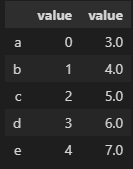

In [ ]:
df1 = pd.DataFrame({'value': [0,1,2,3,4,5]}, index=['a','b','c','d','e','f'])
df2 = pd.DataFrame({'value': [3,4,5,6,7]})

df1

## 8.3. 데이터 재구조화 및 피벗/멜트

### 8.3.1. 데이터 재구조화

In [ ]:
data = pd.DataFrame(np.arange(6).reshape((2, 3)),
                    index=pd.Index(['Ohio', 'Colorado'], name='state'),
                    columns=pd.Index(['one', 'two', 'three'],
                    name='number'))

result = data.stack()
result

df = pd.DataFrame({'left': result, 'right': result + 5},
                  columns=pd.Index(['left', 'right'], name='side'))
df

In [ ]:
## unstack/stack은 제일 안 쪽의 것부터 적용된다.
df.unstack()

In [ ]:
df.unstack('state')

In [ ]:
df.unstack('state').stack('side')

### 8.3.2. melt vs. pivot

#### pivot은 테이블을 형성하고

In [ ]:
data = pd.DataFrame({'cust_id': ['c1', 'c1', 'c1', 'c2', 'c2', 'c2', 'c3', 'c3', 'c3'],
            'prod_cd': ['p1', 'p2', 'p3', 'p1', 'p2', 'p3', 'p1', 'p2', 'p3'],
            'grade' : ['A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B'],
            'pch_amt': [30, 10, 0, 40, 15, 30, 0, 0, 10]})

data

In [ ]:
data.pivot(index='cust_id', columns='prod_cd', values='pch_amt')

In [ ]:
data.pivot(index='prod_cd', columns='cust_id', values='pch_amt')


In [ ]:
pivoted = data.pivot(index=['cust_id','grade'], columns='prod_cd', values='pch_amt')
pivoted

#### melt는 위아래로 길게 쌓는다.

In [ ]:
data = pd.DataFrame({'cust_id' : ['C_001', 'C_001', 'C_002', 'C_002'],
                     'prod_cd' : ['P_001', 'P_002', 'P_001', 'P_002'],
                     'pch_cnt' : [1, 2, 3, 4],
                     'pch_amt' : [100, 200, 300, 400]})
data

In [ ]:
pd.melt(data, id_vars=['cust_id', 'prod_cd'])